In [1]:
# Import the packages required
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [2]:
# load the data from the datasets available in scikit learn
dataset = datasets.load_boston()
print(type(dataset))

<class 'sklearn.utils.Bunch'>


In [6]:
# print the data structure information
print(dataset.keys())
print(dataset.data.shape)
print(dataset.feature_names)
print(dataset.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bos

In [7]:
# select the x and y data
x = dataset.data[:, np.newaxis, 5]
y = dataset.target
print(x.shape, y.shape)
print(x[0], y[0])

(506, 1) (506,)
[6.575] 24.0


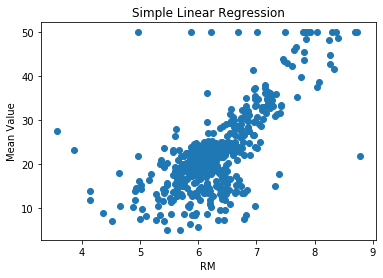

In [8]:
# plot the information
legend = dataset.feature_names[5]

plt.scatter(x, y)
plt.title('Simple Linear Regression')
plt.xlabel(legend)
plt.ylabel('Mean Value')
plt.show()

In [9]:
# Split the dataset in training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 1) (404,)
(102, 1) (102,)


In [10]:
# Define the algorithm to be used, fit the model
alg = linear_model.LinearRegression()
alg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# Generate a prediction over the test data using the model
y_pred = alg.predict(x_test)
print(y_pred.shape)

(102,)


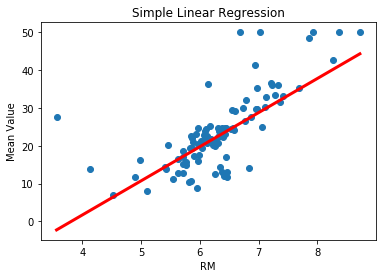

In [12]:
# Graph the test data with the model line
data_test = sorted(zip(x_test, y_pred), key = lambda i : i[0])
plt.scatter(x_test, y_test)
plt.plot([i[0] for i in data_test], [i[1] for i in data_test], color='red', linewidth=3)
plt.title('Simple Linear Regression')
plt.xlabel(legend)
plt.ylabel('Mean Value')
plt.show()

In [13]:
# Obtain the parameters ai for this model
a0 = alg.intercept_
print('a0:', a0)
a1 = alg.coef_[0]
print('a1:', a1)
print('y =', a0, '+', a1, '* x')

a0: -34.375589252833166
a1: 9.018638074263038
y = -34.375589252833166 + 9.018638074263038 * x


In [14]:
# Verify the model error based on R²
print('certainty:', alg.score(x_train, y_train) * 100, '%')
print('certainty:', alg.score(x_test, y_test) * 100, '%')

certainty: 46.38609201542301 %
certainty: 53.75110795404948 %
